In [201]:
import pandas as pd

df = pd.read_csv("obesity_level.csv")

In [202]:
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,0be1dad
0,0,Male,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,Sometimes,0,2.763573,0,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,Frequently,0,2.000000,0,1.000000,1.000000,0,Automobile,0rmal_Weight
2,2,Female,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,Sometimes,0,1.910378,0,0.866045,1.673584,0,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,Sometimes,0,1.674061,0,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,Sometimes,0,1.979848,0,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  int64  
 6   FAVC                            20758 non-null  int64  
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  int64  
 11  CH2O                            20758 non-null  float64
 12  SCC                             

### Handling Missing Values

In [204]:
#Check for missing value
df.isnull().sum()
# no missing values

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
0be1dad                           0
dtype: int64

### remove duplicated Rows

In [205]:
df.duplicated().sum()
#no duplicated to remove

0

### Outlier Detection and Removal

In [206]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
numerical_columns = df.select_dtypes(include=[np.number]).columns
# Number of numerical features
num_features = len(numerical_columns)



Outliers in id:
Empty DataFrame
Columns: [id, Gender, Age, Height, Weight, family_history_with_overweight, FAVC, FCVC, NCP, CAEC, SMOKE, CH2O, SCC, FAF, TUE, CALC, MTRANS, 0be1dad]
Index: []

Outliers in Age:
          id  Gender        Age    Height      Weight  \
25        25    Male  41.318302  1.853223   96.078462   
48        48  Female  37.000000  1.500000   80.000000   
56        56    Male  55.272573  1.700000   80.000000   
80        80  Female  38.098745  1.560215   80.000000   
83        83    Male  38.000000  1.750000   75.000000   
...      ...     ...        ...       ...         ...   
20715  20715  Female  38.088860  1.750000   62.855073   
20725  20725  Female  38.943282  1.565366   80.000000   
20732  20732  Female  35.389491  1.642506   79.843221   
20739  20739    Male  40.501722  1.619128  109.980145   
20752  20752  Female  40.000000  1.554728   77.561602   

       family_history_with_overweight  FAVC      FCVC       NCP        CAEC  \
25                        

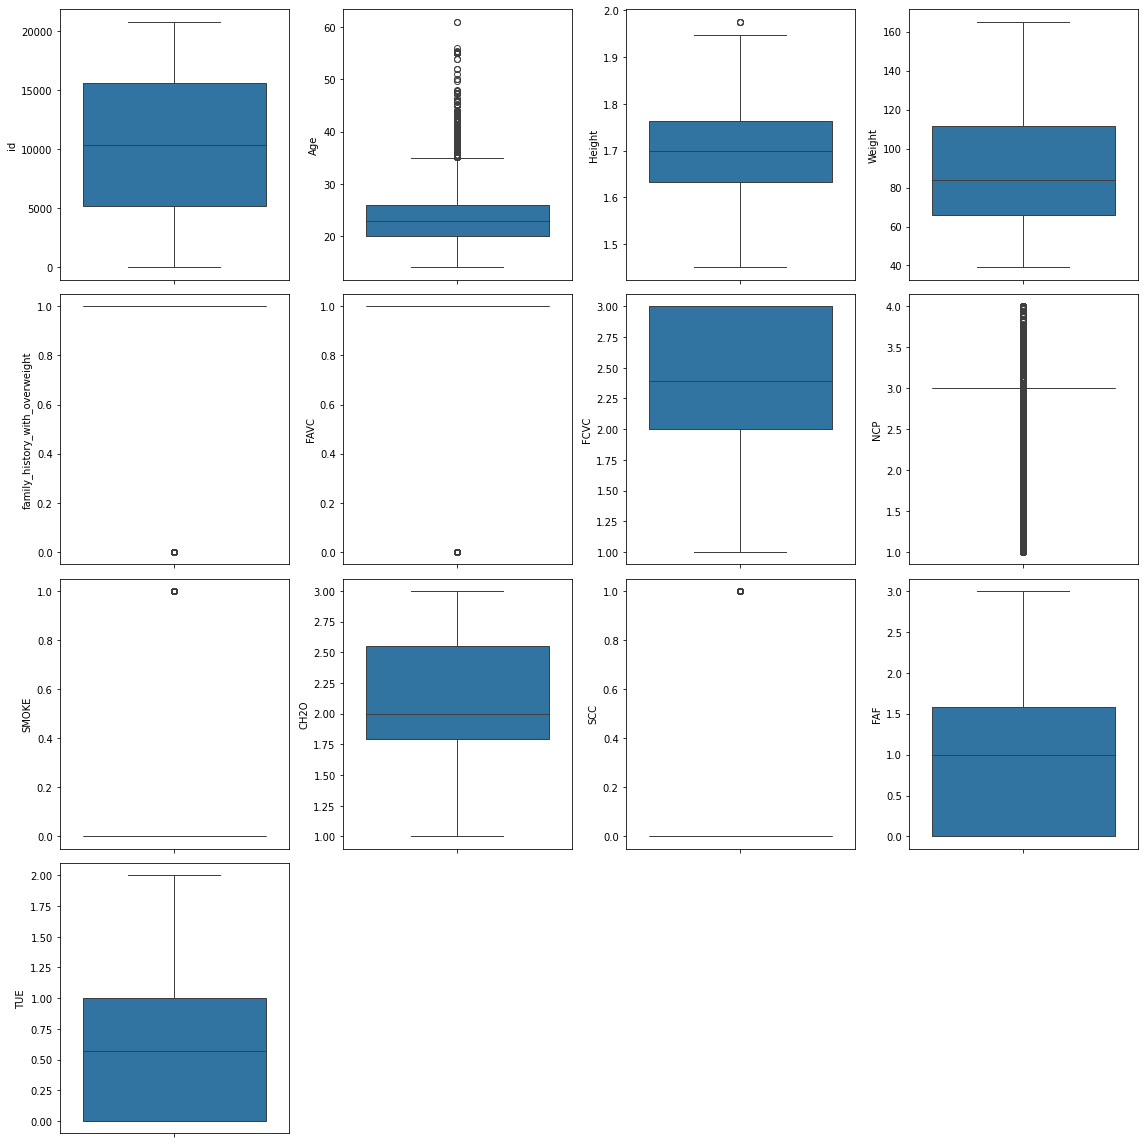


Dataset after removing outliers:
          id  Gender        Age    Height      Weight  \
1          1  Female  18.000000  1.560000   57.000000   
3          3  Female  20.952737  1.710730  131.274851   
5          5    Male  18.128249  1.748524   51.552595   
6          6    Male  29.883021  1.754711  112.725005   
7          7    Male  29.891473  1.750150  118.206565   
...      ...     ...        ...       ...         ...   
20749  20749  Female  25.783865  1.646390  104.835346   
20751  20751  Female  21.030909  1.605495  133.466763   
20753  20753    Male  25.137087  1.766626  114.187096   
20755  20755    Male  20.101026  1.819557  105.580491   
20757  20757    Male  26.680376  1.816547  118.134898   

       family_history_with_overweight  FAVC      FCVC  NCP        CAEC  SMOKE  \
1                                   1     1  2.000000  3.0  Frequently      0   
3                                   1     1  3.000000  3.0   Sometimes      0   
5                                   1 

In [207]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to detect outliers based on IQR
def detect_outliers(df, numerical_columns):
    outliers = {}
    for col in numerical_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
    return outliers

# Function to remove outliers
def remove_outliers(df, numerical_columns):
    for col in numerical_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Detect outliers in numerical columns
outliers = detect_outliers(df, numerical_columns)

# Display outliers
for col, indices in outliers.items():
    print(f"\nOutliers in {col}:")
    print(df.loc[indices])

# Visualize outliers with boxplots
rows = len(numerical_columns) // 4 + 1
cols = 4
plt.figure(figsize=(16, rows * 4))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(rows, cols, i)  
    sns.boxplot(data=df, y=col)
    plt.tight_layout()
plt.show()

# Remove outliers from the dataset
cleaned_df = remove_outliers(df, numerical_columns)

# Display the cleaned dataset
print("\nDataset after removing outliers:")
print(cleaned_df)


### Encoding Categorical Variables

In [208]:
# Label Encoding for ordinal attributes
CAEC_order = {'0': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
CALC_order = {'0': 0, 'Sometimes': 1, 'Frequently': 2}

cleaned_df['CAEC_Encoded'] = cleaned_df['CAEC'].map(CAEC_order)
cleaned_df['CALC_Encoded'] = cleaned_df['CALC'].map(CAEC_order)

# One-Hot Encoding for nominal attributes
cleaned_df = pd.get_dummies(cleaned_df, columns=['MTRANS', 'Gender'], drop_first=False)

In [209]:
cleaned_df.head()

,id,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,0be1dad,CAEC_Encoded,CALC_Encoded,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,Gender_Female,Gender_Male
1,1,18.000000,1.560000,57.000000,1,1,2.000000,3.0,Frequently,0,2.000000,0,1.000000,1.000000,0,0rmal_Weight,2,0,True,False,False,False,False,True,False
3,3,20.952737,1.710730,131.274851,1,1,3.000000,3.0,Sometimes,0,1.674061,0,1.467863,0.780199,Sometimes,Obesity_Type_III,1,1,False,False,False,True,False,True,False
5,5,18.128249,1.748524,51.552595,1,1,2.919751,3.0,Sometimes,0,2.137550,0,1.930033,1.000000,Sometimes,Insufficient_Weight,1,1,False,False,False,True,False,False,True
6,6,29.883021,1.754711,112.725005,1,1,1.991240,3.0,Sometimes,0,2.000000,0,0.000000,0.696948,Sometimes,Obesity_Type_II,1,1,True,False,False,False,False,False,True
7,7,29.891473,1.750150,118.206565,1,1,1.397468,3.0,Sometimes,0,2.000000,0,0.598655,0.000000,Sometimes,Obesity_Type_II,1,1,True,False,False,False,False,False,True


In [210]:
# Convert all True/False columns to numeric
columns = ['MTRANS_Automobile','MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking','Gender_Female', 'Gender_Male']
for c in columns:
    cleaned_df[c] = cleaned_df[c].apply(lambda x: 1 if x else 0)


In [211]:
cleaned_df.head()

,id,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,0be1dad,CAEC_Encoded,CALC_Encoded,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,Gender_Female,Gender_Male
1,1,18.000000,1.560000,57.000000,1,1,2.000000,3.0,Frequently,0,2.000000,0,1.000000,1.000000,0,0rmal_Weight,2,0,1,0,0,0,0,1,0
3,3,20.952737,1.710730,131.274851,1,1,3.000000,3.0,Sometimes,0,1.674061,0,1.467863,0.780199,Sometimes,Obesity_Type_III,1,1,0,0,0,1,0,1,0
5,5,18.128249,1.748524,51.552595,1,1,2.919751,3.0,Sometimes,0,2.137550,0,1.930033,1.000000,Sometimes,Insufficient_Weight,1,1,0,0,0,1,0,0,1
6,6,29.883021,1.754711,112.725005,1,1,1.991240,3.0,Sometimes,0,2.000000,0,0.000000,0.696948,Sometimes,Obesity_Type_II,1,1,1,0,0,0,0,0,1
7,7,29.891473,1.750150,118.206565,1,1,1.397468,3.0,Sometimes,0,2.000000,0,0.598655,0.000000,Sometimes,Obesity_Type_II,1,1,1,0,0,0,0,0,1


### Normalization/Scaling

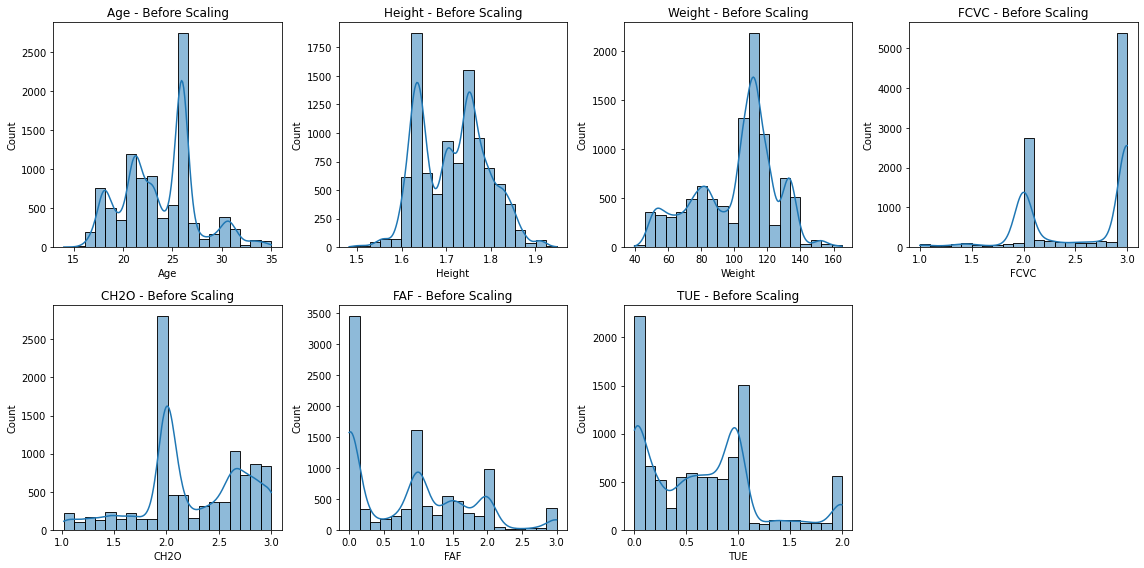

In [212]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
Col_Normalize = ['Age', 'Height', 'Weight', 'FCVC', 'CH2O', 'FAF', 'TUE']
num_features = len(Col_Normalize)
rows = (num_features + 3) // 4
cols = 4

# Plot histograms before scaling
plt.figure(figsize=(16, rows * 4))
for i, feature in enumerate(Col_Normalize, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(cleaned_df[feature], kde=True, bins=20)
    plt.title(f'{feature} - Before Scaling')
plt.tight_layout()
plt.show()

In [213]:
# Initialize the scaler
scaler = StandardScaler()

# Scale the numerical features
cleaned_df[Col_Normalize] = scaler.fit_transform(cleaned_df[Col_Normalize])
# Displaying the scaled features
print("Scaled Numerical Features:")
print(cleaned_df[Col_Normalize].head(20))

Scaled Numerical Features:
         Age    Height    Weight      FCVC      CH2O       FAF       TUE
1  -1.529819 -2.032878 -1.849821 -1.082576 -0.517348  0.133899  0.634449
3  -0.746212 -0.063594  1.229590  0.829534 -1.175262  0.694609  0.234414
5  -1.495784  0.430184 -2.075668  0.676089 -0.239701  1.248496  0.634449
6   1.623738  0.511017  0.460520 -1.099326 -0.517348 -1.064550  0.082898
7   1.625981  0.451427  0.687784 -2.234684 -0.517348 -0.347092 -1.185539
9   0.593248 -1.002888  0.400430  0.829534  0.758867 -1.064550 -0.787608
10 -0.999053 -0.857030 -1.518143  0.829534  1.501171  0.133899 -1.185539
13 -0.624188  0.175691  1.240138  0.829534 -0.599036  0.644093  0.539598
18 -0.468286 -0.203781 -0.896248 -2.994686 -0.517348 -1.064550  0.634449
19  0.458660  0.734506  0.532887 -2.243868 -2.055345  0.251234 -0.058945
22  0.571626 -0.682730  0.454476  0.829534  0.944260 -1.064550 -1.037836
24 -1.529819  0.492856 -2.054700 -1.082576 -0.371623 -0.249048  1.105609
26  0.593248 -1.360528  

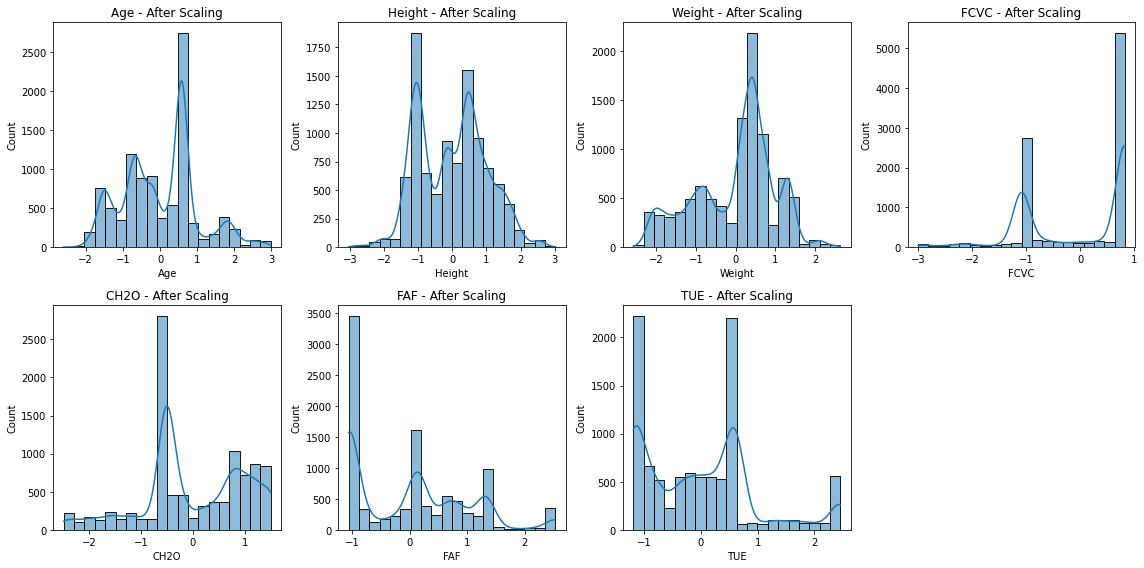

In [214]:
# Plot histograms after scaling
plt.figure(figsize=(16, rows * 4))
for i, feature in enumerate(Col_Normalize, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(cleaned_df[feature], kde=True, bins=20)
    plt.title(f'{feature} - After Scaling')
plt.tight_layout()
plt.show()
    

### Drop, Move and Rename column

In [215]:
# Dropping original categorical columns and unuseful columns and also constant column
cleaned_df = cleaned_df.drop(columns=['id','family_history_with_overweight','FAVC','NCP','CAEC','SMOKE','SCC','CALC'])
cleaned_df.head(10)

,Age,Height,Weight,FCVC,CH2O,FAF,TUE,0be1dad,CAEC_Encoded,CALC_Encoded,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,Gender_Female,Gender_Male
1,-1.529819,-2.032878,-1.849821,-1.082576,-0.517348,0.133899,0.634449,0rmal_Weight,2,0,1,0,0,0,0,1,0
3,-0.746212,-0.063594,1.229590,0.829534,-1.175262,0.694609,0.234414,Obesity_Type_III,1,1,0,0,0,1,0,1,0
5,-1.495784,0.430184,-2.075668,0.676089,-0.239701,1.248496,0.634449,Insufficient_Weight,1,1,0,0,0,1,0,0,1
6,1.623738,0.511017,0.460520,-1.099326,-0.517348,-1.064550,0.082898,Obesity_Type_II,1,1,1,0,0,0,0,0,1
7,1.625981,0.451427,0.687784,-2.234684,-0.517348,-0.347092,-1.185539,Obesity_Type_II,1,1,1,0,0,0,0,0,1
9,0.593248,-1.002888,0.400430,0.829534,0.758867,-1.064550,-0.787608,Obesity_Type_III,1,1,0,0,0,1,0,1,0
10,-0.999053,-0.857030,-1.518143,0.829534,1.501171,0.133899,-1.185539,Overweight_Level_I,1,1,0,0,0,1,0,1,0
13,-0.624188,0.175691,1.240138,0.829534,-0.599036,0.644093,0.539598,Obesity_Type_III,1,1,0,0,0,1,0,1,0
18,-0.468286,-0.203781,-0.896248,-2.994686,-0.517348,-1.064550,0.634449,Overweight_Level_II,1,0,0,0,0,1,0,0,1
19,0.458660,0.734506,0.532887,-2.243868,-2.055345,0.251234,-0.058945,Obesity_Type_II,1,1,0,0,0,1,0,0,1


In [216]:
# Move the '0be1dad' column to the last position
target_column = '0be1dad'
cleaned_df = cleaned_df[[col for col in cleaned_df if col != target_column] + [target_column]]

# Rename the column
cleaned_df = cleaned_df.rename(columns={target_column: 'class'})

In [217]:
cleaned_df.head(10)

,Age,Height,Weight,FCVC,CH2O,FAF,TUE,CAEC_Encoded,CALC_Encoded,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,Gender_Female,Gender_Male,class
1,-1.529819,-2.032878,-1.849821,-1.082576,-0.517348,0.133899,0.634449,2,0,1,0,0,0,0,1,0,0rmal_Weight
3,-0.746212,-0.063594,1.229590,0.829534,-1.175262,0.694609,0.234414,1,1,0,0,0,1,0,1,0,Obesity_Type_III
5,-1.495784,0.430184,-2.075668,0.676089,-0.239701,1.248496,0.634449,1,1,0,0,0,1,0,0,1,Insufficient_Weight
6,1.623738,0.511017,0.460520,-1.099326,-0.517348,-1.064550,0.082898,1,1,1,0,0,0,0,0,1,Obesity_Type_II
7,1.625981,0.451427,0.687784,-2.234684,-0.517348,-0.347092,-1.185539,1,1,1,0,0,0,0,0,1,Obesity_Type_II
9,0.593248,-1.002888,0.400430,0.829534,0.758867,-1.064550,-0.787608,1,1,0,0,0,1,0,1,0,Obesity_Type_III
10,-0.999053,-0.857030,-1.518143,0.829534,1.501171,0.133899,-1.185539,1,1,0,0,0,1,0,1,0,Overweight_Level_I
13,-0.624188,0.175691,1.240138,0.829534,-0.599036,0.644093,0.539598,1,1,0,0,0,1,0,1,0,Obesity_Type_III
18,-0.468286,-0.203781,-0.896248,-2.994686,-0.517348,-1.064550,0.634449,1,0,0,0,0,1,0,0,1,Overweight_Level_II
19,0.458660,0.734506,0.532887,-2.243868,-2.055345,0.251234,-0.058945,1,1,0,0,0,1,0,0,1,Obesity_Type_II


In [218]:
mapping = {
    'Overweight_Level_II': 'OvlII',
    '0rmal_Weight': 'Normal',
    'Insufficient_Weight': 'Insuff',
    'Obesity_Type_III': 'ObIII',
    'Obesity_Type_II': 'ObII',
    'Overweight_Level_I': 'OvlI',
    'Obesity_Type_I': 'ObI'
}

# Replace the values using the mapping
cleaned_df['class'] = cleaned_df['class'].map(mapping)

In [219]:
cleaned_df.head(10)

,Age,Height,Weight,FCVC,CH2O,FAF,TUE,CAEC_Encoded,CALC_Encoded,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,Gender_Female,Gender_Male,class
1,-1.529819,-2.032878,-1.849821,-1.082576,-0.517348,0.133899,0.634449,2,0,1,0,0,0,0,1,0,Normal
3,-0.746212,-0.063594,1.229590,0.829534,-1.175262,0.694609,0.234414,1,1,0,0,0,1,0,1,0,ObIII
5,-1.495784,0.430184,-2.075668,0.676089,-0.239701,1.248496,0.634449,1,1,0,0,0,1,0,0,1,Insuff
6,1.623738,0.511017,0.460520,-1.099326,-0.517348,-1.064550,0.082898,1,1,1,0,0,0,0,0,1,ObII
7,1.625981,0.451427,0.687784,-2.234684,-0.517348,-0.347092,-1.185539,1,1,1,0,0,0,0,0,1,ObII
9,0.593248,-1.002888,0.400430,0.829534,0.758867,-1.064550,-0.787608,1,1,0,0,0,1,0,1,0,ObIII
10,-0.999053,-0.857030,-1.518143,0.829534,1.501171,0.133899,-1.185539,1,1,0,0,0,1,0,1,0,OvlI
13,-0.624188,0.175691,1.240138,0.829534,-0.599036,0.644093,0.539598,1,1,0,0,0,1,0,1,0,ObIII
18,-0.468286,-0.203781,-0.896248,-2.994686,-0.517348,-1.064550,0.634449,1,0,0,0,0,1,0,0,1,OvlII
19,0.458660,0.734506,0.532887,-2.243868,-2.055345,0.251234,-0.058945,1,1,0,0,0,1,0,0,1,ObII


### Correlation Matrix

In [220]:
columnPCA = [
    "Age", "Height", "Weight", "FCVC", "CH2O", "FAF", "TUE", 
    "CAEC_Encoded", "CALC_Encoded", "MTRANS_Automobile", "MTRANS_Bike", 
    "MTRANS_Motorbike", "MTRANS_Public_Transportation", "MTRANS_Walking", 
    "Gender_Female", "Gender_Male"
]
correlation_matrix = cleaned_df[columnPCA].corr()
print(correlation_matrix)

                                   Age    Height    Weight      FCVC  \
Age                           1.000000 -0.020964  0.292123  0.112811   
Height                       -0.020964  1.000000  0.232014 -0.261932   
Weight                        0.292123  0.232014  1.000000  0.376945   
FCVC                          0.112811 -0.261932  0.376945  1.000000   
CH2O                          0.011601  0.018624  0.207295  0.139551   
FAF                          -0.319554  0.405511 -0.059134 -0.188406   
TUE                          -0.320835  0.089704 -0.171443 -0.196022   
CAEC_Encoded                 -0.176182 -0.004058 -0.358246 -0.103179   
CALC_Encoded                  0.206705  0.027294  0.345277  0.227748   
MTRANS_Automobile             0.445215  0.185378 -0.045533 -0.171474   
MTRANS_Bike                  -0.011870  0.020146 -0.039579 -0.019857   
MTRANS_Motorbike             -0.015981  0.013135 -0.034693 -0.010874   
MTRANS_Public_Transportation -0.388051 -0.188990  0.089630  0.18

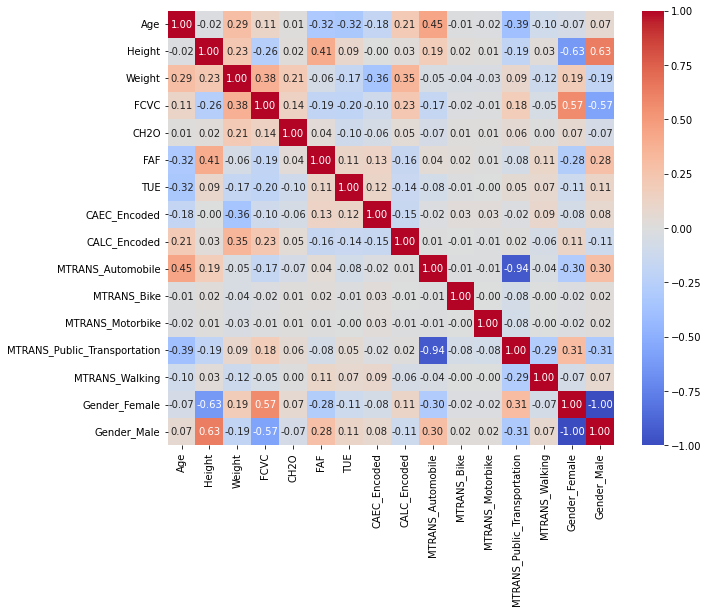

In [221]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(cleaned_df[columnPCA].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [222]:
!pip install scipy


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from sklearn.model_selection import train_test_split

train_data, validation_data = train_test_split(cleaned_df, test_size=0.2, random_state=42)



In [ ]:
from scipy.io import arff
import pandas as pd

# Function to convert DataFrame to ARFF format and save
def save_to_arff(cleaned_df, filename, relation_name="data"):
    with open(filename, 'w') as f:
        # Write the ARFF header
        f.write(f"@relation {relation_name}\n\n")
        
        # Define attributes
        for col in cleaned_df.columns:
            f.write(f"@attribute {col} real\n")
        
        # Write the data section
        f.write("\n@data\n")
        for row in cleaned_df.values:
            f.write(",".join(map(str, row)) + "\n")


save_to_arff(train_data, 'train_data.arff', "Obesity_Risk_train_data")
save_to_arff(validation_data, 'validation_data.arff', "Obesity_Risk_validation_data")


In [ ]:
cleaned_df.to_csv('cleaned_data_1.csv', index=False)